# CIS 443-01 - Analytics Programming
## Exam 3 Q3: Regression

__Worth__: 10 pts.<br>
__Naming convention__: The naming convention is as follows: Exam#, hyphen, question #, hyphen, lastname, and extension (e.g., Exam3-Q1-Im.ipynb).

### Instructions
Run multiple regression using the LinearRegression estimator for the Iris dataset. 

### Hints
Refer to textbook pp. 625-. 

### Requirements
```
1)	Set the 60-40 train-test split. 
2)	Set the display precision to 3. You should use “display.precison” instead of “precision”.
3)	Set random_state=12.
4)	Do not visualize the features.
5)	After training, test the model with the first five samples.
```

### Outputs
```
a)	Display the summary statistics.
b)	Display the regression coefficients and intercept.
c)	Display the results of a test with the first five samples. 
d)	Calculate R2 score and mean square error. 
```

### Bonus
```
a)	Visualize the expected vs predicted values. (Bonus point: 10)
```


In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=12, test_size=0.40)

x_test.shape

(60, 4)

In [34]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.describe


<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [35]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(X=x_train,y=y_train)

for i,name in enumerate(iris.feature_names):
    print(f"{name:.10}: {linear_regression.coef_[i]}")

sepal leng: -0.16188246607188425
sepal widt: -0.02157580655134561
petal leng: 0.28879553729452
petal widt: 0.530053192696509


In [40]:
predicted = linear_regression.predict(x_test)

expected = y_test

predicted[:5]

array([-5.62167328e-02,  1.67154046e+00, -1.30466919e-03,  1.18424930e+00,
        2.04743343e+00])

In [41]:
expected[:5]

array([0, 2, 0, 1, 2])

In [42]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.9384042152255253

In [43]:
metrics.mean_squared_error(expected, predicted)

0.04002015016319341

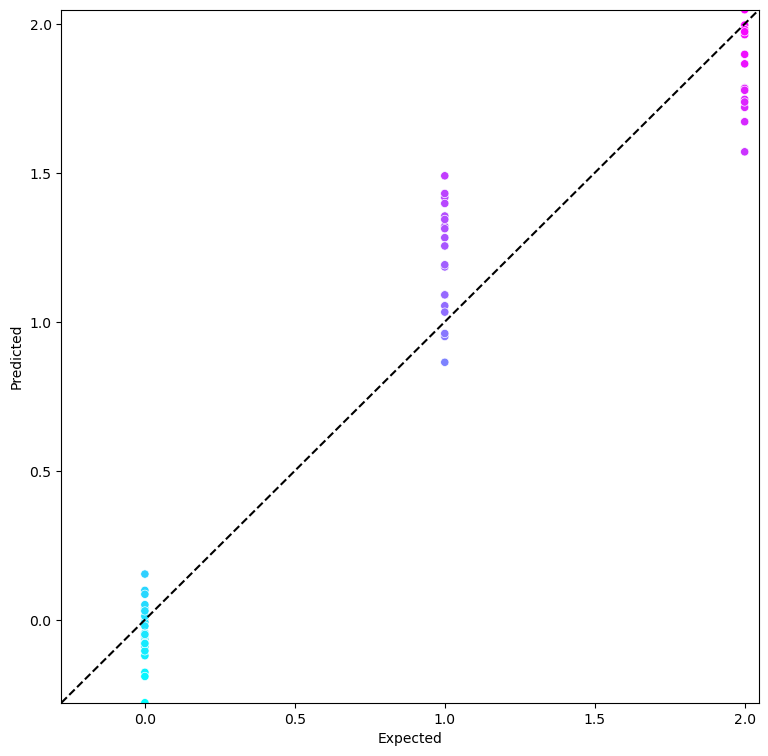

In [54]:
# Bonus Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()

df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max() )
axes.set_xlim(start,end)
axes.set_ylim(start, end)

line = plt.plot([start,end], [start, end], 'k--')

